In [1]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append('../')
from sklearn.metrics import mean_squared_error
import re
import numpy as np

In [2]:
from core.models import rUNet
from core.utils.inference import inference_phase_rUNet_plot_notebook
from core.utils.data import define_dataset, select_dist

In [3]:
from core.utils.data.transformers import ChannelsFirst, Rescale, ToTensor, Crop, GaussianNoise, RandomCrop, Swap, \
        FlipUD, FlipLR

In [4]:
from functools import partial

In [5]:
import torch

In [6]:
%matplotlib inline

In [7]:
regex = re.compile(r'\d+')

In [12]:
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss_augmentation_from_epoch50_gaus150'

In [13]:
root_path = partial(os.path.join, saved_models)

In [14]:
data_folder = ('/storage/yw18581/data/dataset/')

In [15]:
model_names = os.listdir(saved_models)

In [16]:
def get_fnames(coeff, prefix='Trained'):
    idx_coef = 6 if prefix=='Trained' else 4
    idx_epoch = 5 if prefix =='Trained' else 3
    f_list = []
    epochs = []
    for fname in model_names:
        if fname.startswith(prefix):
            if regex.findall(fname.split("_")[idx_coef])[1]==str(coeff):
                epoch = int(regex.findall(fname.split("_")[idx_epoch])[0]) 
                epochs.append(epoch)
                if int(regex.findall(fname.split("_")[idx_epoch])[0])==epoch:
                    f_list.append(fname)
    
    return np.array(f_list)[np.argsort(epochs)], np.sort(epochs)

---

### Inference on test unseen data

In [17]:
training_dist = [2,4,10,20,25,35]
unseen_dist = [1,3,15,30]
selected_distances = select_dist(data_folder, unseen_dist)

In [18]:
base_transformers = [Crop(row_slice=slice(0,1400), col_slice=slice(1000,None)),
                           Rescale(scale=0.25), ChannelsFirst(),ToTensor()]

In [19]:
base_transfofrmers_2 = [RandomCrop(p=1), Swap(p=0.7), FlipLR(p=0.7), FlipUD(p=0.7),
                        Rescale(0.25), ChannelsFirst(),ToTensor()]

In [20]:
data_loaders, data_length = define_dataset(root_folder=data_folder, 
                                           base_transformers=base_transformers,
                                           train_transformers=base_transformers,
                                           batch_size=4, include_list=selected_distances,
                                            alldata=True, multi_processing=4)

In [21]:
def predict_coef_epoch(coeff, epoch):
    filelist, epochs = get_fnames(coeff)
    model_fname = filelist[int(np.argwhere(epochs==epoch)[0])]
    print(model_fname)
    torch.cuda.empty_cache()
    model = rUNet(out_size=1)
    checkpoint = torch.load(root_path(model_fname))['model_state_dict']
    #print(checkpoint)
    model.load_state_dict(checkpoint)
    
    print('Checkpoint loaded')
    inference_phase_rUNet_plot_notebook(model, data_loaders, data_length,
                                       batch_size=4, stop=1, test=False)

    return

Trained_rUNet_pytorch_6positions_dataset_110epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: true_dist: 15, pred_dist: [9.261053]


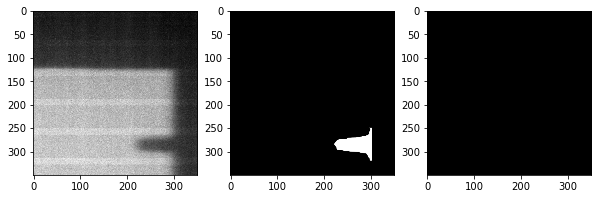

2: true_dist: 15, pred_dist: [12.225747]


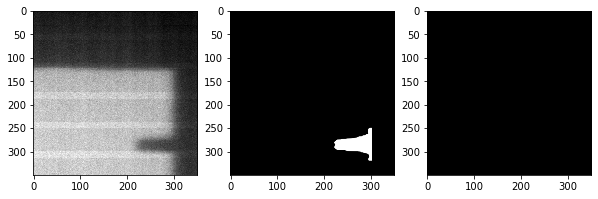

3: true_dist: 15, pred_dist: [10.928608]


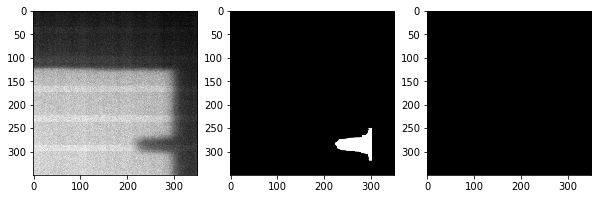

4: true_dist: 15, pred_dist: [9.744109]


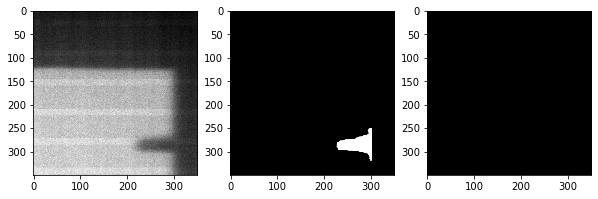

batch 2
1: true_dist: 15, pred_dist: [10.108637]


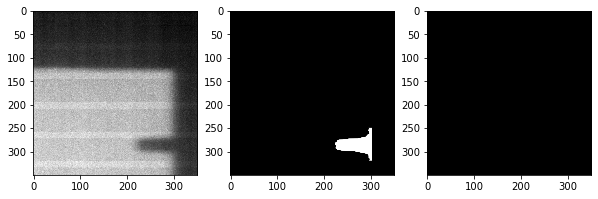

2: true_dist: 15, pred_dist: [10.775308]


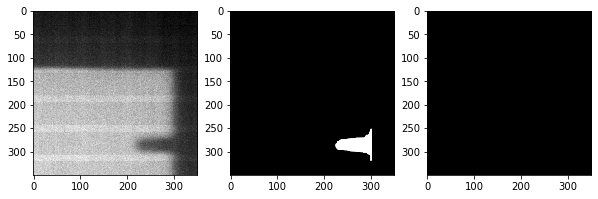

3: true_dist: 15, pred_dist: [12.039327]


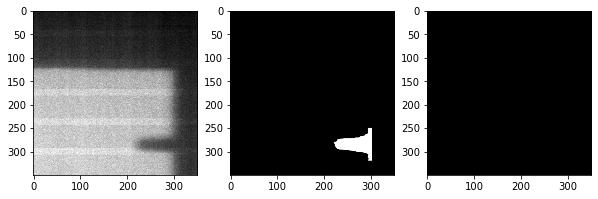

4: true_dist: 15, pred_dist: [10.286826]


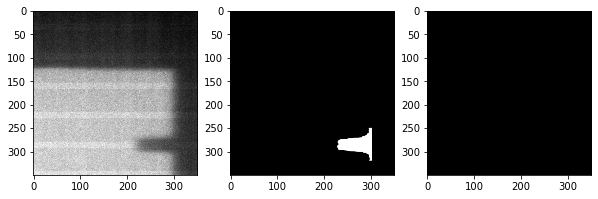

Trained_rUNet_pytorch_6positions_dataset_120epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: true_dist: 15, pred_dist: [11.848047]


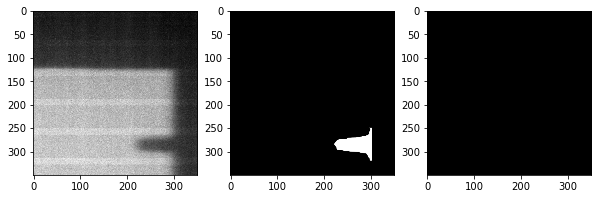

2: true_dist: 15, pred_dist: [13.49547]



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa3c820a048>
Traceback (most recent call last):
  File "/storage/yw18581/src/env_dir/mlearning/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/storage/yw18581/src/env_dir/mlearning/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/storage/yw18581/src/env_dir/mlearning/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/storage/yw18581/src/env_dir/mlearning/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/storage/yw18581/src/env_dir/mlearning/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


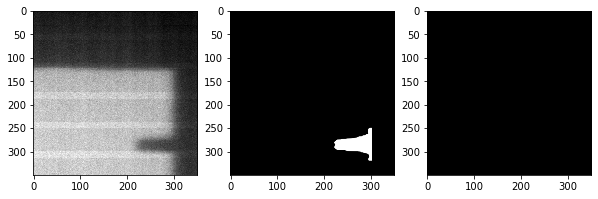

3: true_dist: 15, pred_dist: [12.443066]


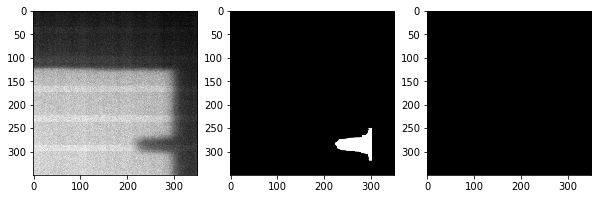

4: true_dist: 15, pred_dist: [11.925163]


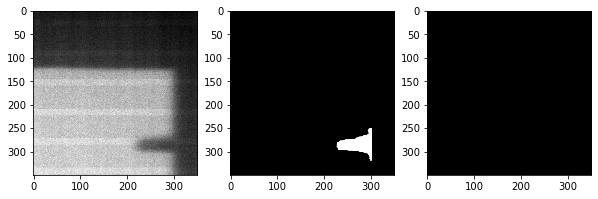

batch 2
1: true_dist: 15, pred_dist: [12.845611]


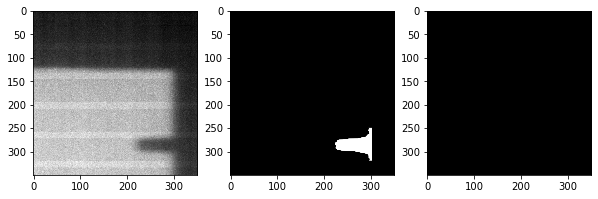

2: true_dist: 15, pred_dist: [12.61582]


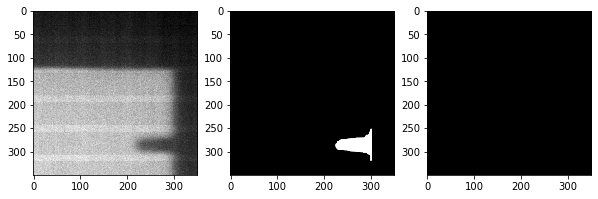

3: true_dist: 15, pred_dist: [12.858613]


KeyboardInterrupt: 

In [18]:
for epoch in np.arange(110, 160, 10):
    predict_coef_epoch(4, epoch)

Trained_rUNet_pytorch_6positions_dataset_200epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: true_dist: 15, pred_dist: [14.573224]


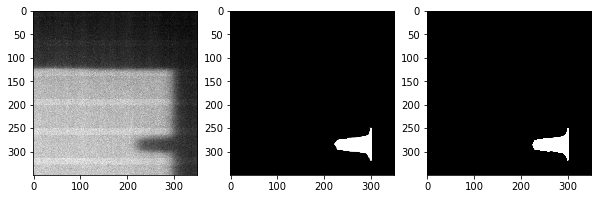

2: true_dist: 15, pred_dist: [14.397039]


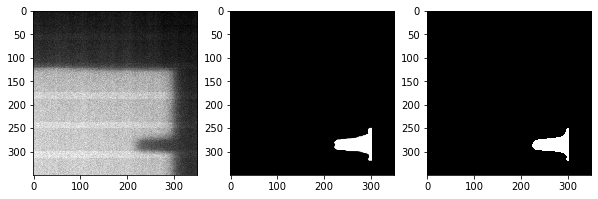

3: true_dist: 15, pred_dist: [14.483121]


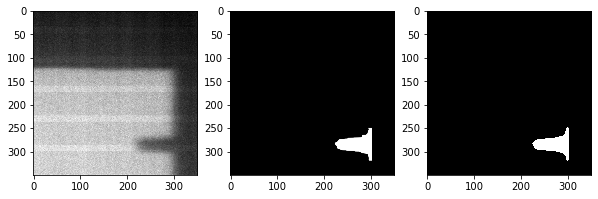

4: true_dist: 15, pred_dist: [14.448736]


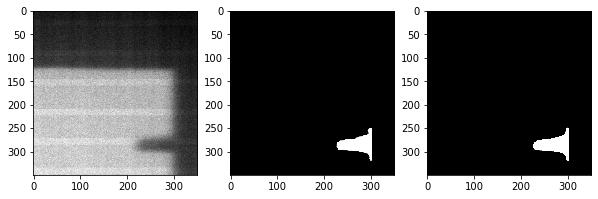

batch 2
1: true_dist: 15, pred_dist: [14.370866]


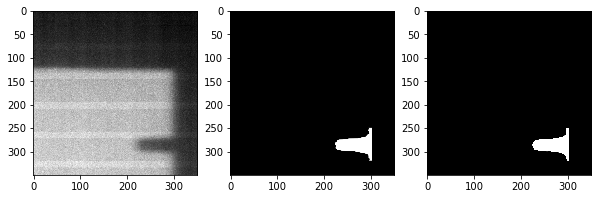

2: true_dist: 15, pred_dist: [14.618644]


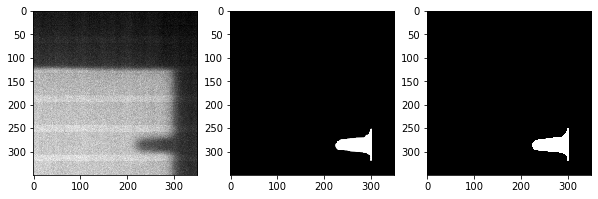

3: true_dist: 15, pred_dist: [14.330252]


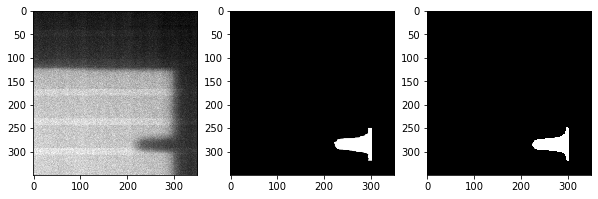

4: true_dist: 15, pred_dist: [14.272121]


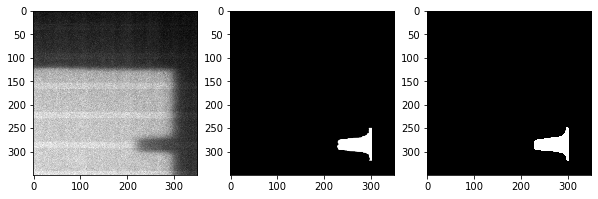

In [22]:
predict_coef_epoch(4, 200)

### Test on multi-leaf dataset

In [23]:
data_folder_multi = '/storage/yw18581/data/v2_avg/top_right/'

In [24]:
excluded = []

In [25]:
data_loaders, data_length = define_dataset(root_folder=data_folder_multi, base_transformers=base_transformers,
                                           train_transformers=base_transformers,
                                           batch_size=4, excluded_list=excluded,
                                            alldata=True, multi_processing=4, load_mask=False)

In [26]:
def inference_phase_rUNet_plot_notebook(model, data_loaders, data_lengths, batch_size, stop=1, dev=0, test=True):
    from tqdm.notebook import tqdm
    import matplotlib.pyplot as plt

    device = torch.device("cuda:{}".format(dev) if torch.cuda.is_available() else "cpu")
    # model = cUNet(out_size=1)

    # model.load_state_dict(torch.load(model_name))
    model.eval()
    model.to(device);
    for i, batch in tqdm(enumerate(data_loaders), total=data_lengths // batch_size,
                     desc="Batch"):

        true_images = batch["image"]
        pred_masks, pred_dists = model(true_images.float().to(device))
        print("batch {}".format(i + 1))
        for j, (img, pr_msk, pr_dist) in enumerate(zip(true_images,
                                                                        pred_masks.cpu().detach().numpy(),
                                                                        pred_dists.cpu().detach().numpy())):
            print("{}: pred_dist: {}".format(j + 1, pr_dist))

            f = plt.figure(figsize=(10, 5))
            f.add_subplot(1, 2, 1)
            plt.imshow(img[0, ...], cmap='gray')
            f.add_subplot(1, 2, 2)
            plt.imshow(pr_msk[0, ...], cmap='gray')
            plt.show(block=True)

        if i == stop:
            break

Trained_rUNet_pytorch_6positions_dataset_140epochs_0.4coeff_mask.pkl
Checkpoint loaded


batch 1
1: pred_dist: [0.36789402]


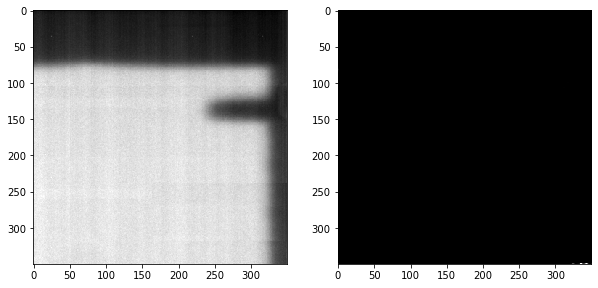

2: pred_dist: [0.36817983]


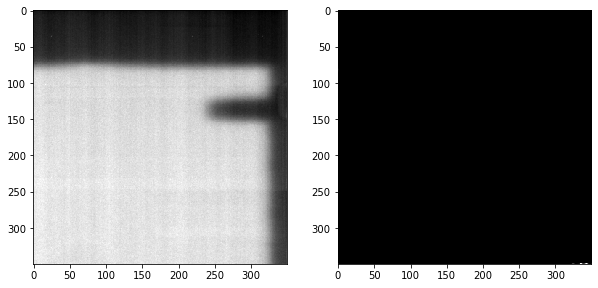

3: pred_dist: [0.36803442]


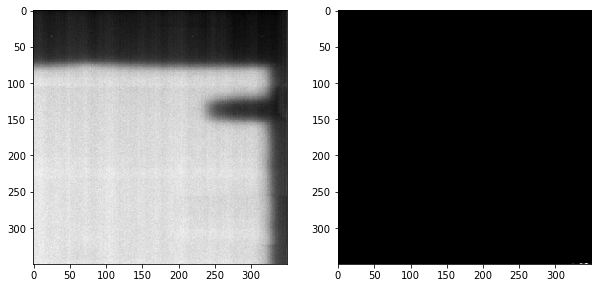

4: pred_dist: [0.36883745]


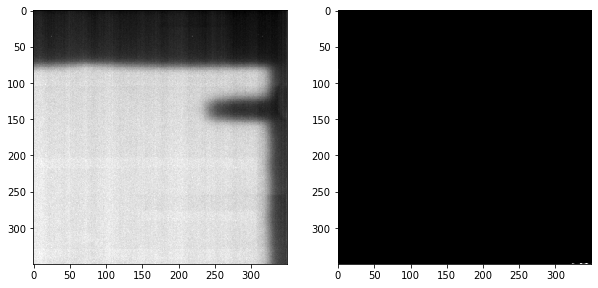

batch 2
1: pred_dist: [0.36874413]


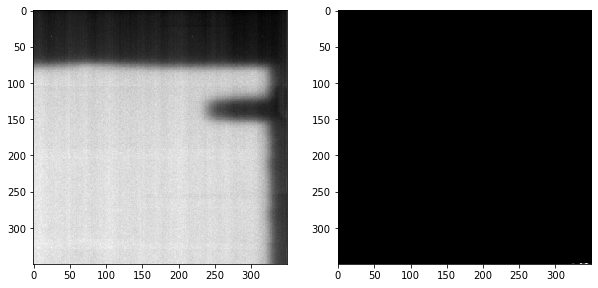

2: pred_dist: [0.36806384]


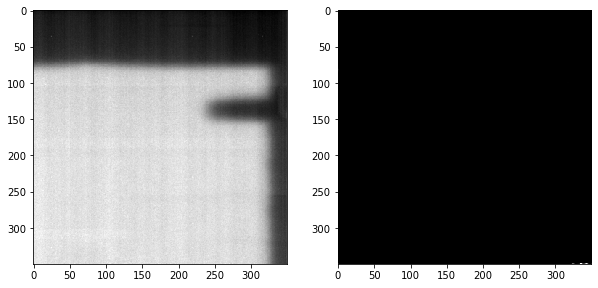

3: pred_dist: [0.36869672]


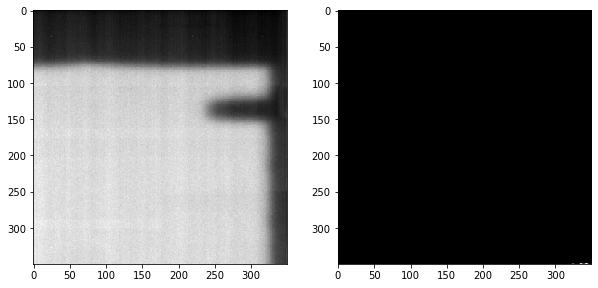

4: pred_dist: [0.3682106]


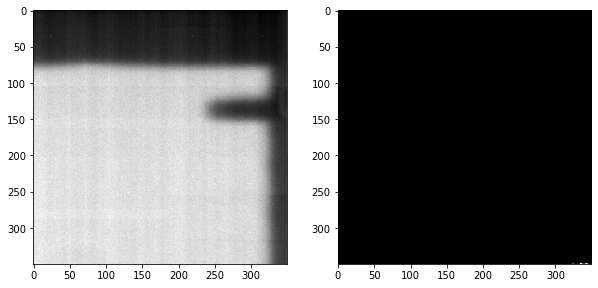

In [38]:
predict_coef_epoch(4,140)

---

#### Check training performance

In [37]:
np.argmin(history['val_dice'])

142

In [28]:
history_100 = np.load('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/history_Trained_rUNet_pytorch_100epochs_0.4coef.pkl', allow_pickle=True)

In [29]:
history_100.keys()

dict_keys(['train', 'val', 'train_dice', 'train_mse', 'val_dice', 'val_mse', 'epochs'])

In [30]:
history = np.load(os.path.join(saved_models,model_names[-1]), allow_pickle=True)

In [31]:
history.keys()

dict_keys(['train', 'val', 'train_dice', 'train_mse', 'val_dice', 'val_mse', 'epochs'])

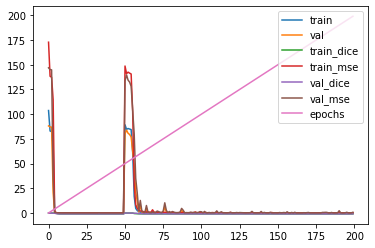

In [32]:
for key in history.keys():
    plt.plot(np.hstack((history_100['epochs'][:50],history['epochs'])), np.hstack((history_100[key][:50],history[key])), 
             label=key)
plt.legend(loc='upper right')

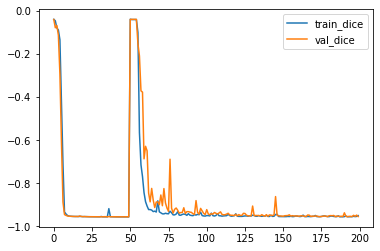

In [33]:
for key in history.keys():
    if 'dice' in key:
        plt.plot(np.hstack((history_100['epochs'][:50],history['epochs'])), np.hstack((history_100[key][:50],history[key])), 
             label=key)
plt.legend(loc='upper right')
#plt.ylim(-0.002,0)

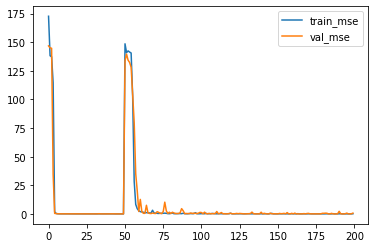

In [35]:
for key in history.keys():
    if 'mse' in key:
        plt.plot(np.hstack((history_100['epochs'][:50],history['epochs'])), np.hstack((history_100[key][:50],history[key])), 
             label=key)
plt.legend(loc='upper right')
#plt.ylim(-0.002,0)